<a href="https://colab.research.google.com/github/DanayaDiarra/MachineLearning/blob/main/Face_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CEO Face Recognition System**
### **Project Description**

A `facial recognition` system that identifies and verifies prominent CEOs and tech leaders using `DeepFace`. The system creates a database of business executives and performs automated face `verification`, `similarity search`, and `facial analysis`.

### **Key Features**
* CEO Database:
Images of top business leaders (Elon Musk, Bill Gates, Sam Altman, Jeff Bezos, Mark Zuckerberg, Tony Elumelu, Ren Zhengfei, Herman Gref)

* Face Verification: Confirms if two images show the same person

* Similarity Search: Finds the most similar faces within the CEO database

* Facial Analysis: Provides demographic insights including age, gender, emotion, and ethnicity predictions

### **Technical Implementation**
* DeepFace Framework: Uses `VGG-Face model` for zero-shot face recognition

* Automated Database: Downloads and processes CEO images from web sources

* Multiple Functions: `verify()` for authentication, `find()` for similarity matching, `analyze()` for attribute detection

### **Use Cases**
* **Corporate security systems**

* **Executive identification platforms**

* **Business networking applications**

* **Automated attendance for leadership events**

The system demonstrates practical face recognition applications in business environments

In [1]:
# Install DeepFace
!pip install deepface

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.3/128.3 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 62.9 MB/s eta 0:00:00


### #Pkgs

In [3]:
import os
from deepface import DeepFace
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from PIL import Image
import numpy as np

### #Create directory and get data from Internet

In [35]:
os.makedirs('face_database', exist_ok=True)

In [58]:
# # Download sample celebrity images
# !wget -O face_database/Elon_Musk.jpg "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT1-MXUc6ZkxBNNdj3-YW8SSJX-WGgjUXsxWg&s"
# !wget -O face_database/Ren_Zhengfei.jpg "https://cdn.i-scmp.com/sites/default/files/styles/1020x680/public/d8/images/canvas/2024/10/31/fd33b9ff-46f0-41e8-9a00-e9e00fd21a3f_19df494d.jpg?itok=VvpXAZ8u&v=1730378188"
# !wget -O face_database/BillGates.jpg "https://cdn.i-scmp.com/sites/default/files/styles/768x768/public/d8/images/methode/2020/10/30/04ab8528-11db-11eb-88e1-abf0a3fa7ebf_image_hires_172427.jpg?itok=egLpJ4wE&v=1604049872"
# !wget -O face_database/Sam_Altman.jpg "https://www.artnews.com/wp-content/uploads/2025/04/samaltman.jpg?w=1024"
# !wget -O face_database/Jeff.jpg "https://www.shutterstock.com/image-photo/jeff-bezos-american-businessman-best-600nw-2673780783.jpg"
# !wget -O face_database/Mark.jpg "https://img-cdn.inc.com/image/upload/f_webp,c_fit,w_1920,q_auto/images/panoramic/mark-zuckerberg-headshot-web_77358.jpg"
# !wget -O face_database/Tony1.jpg "https://www.heirsholdings.com/wp-content/uploads/2025/03/image00006.jpeg-1024x683.jpg"
# !wget -O face_database/Tony2.jpg 'https://i0.wp.com/blerf.org/wp-content/uploads/2018/04/Tony-Elumelu-.jpg?fit=640%2C586&ssl=1'
# !wget -O face_database/Gref.jpg "https://theins.ru/images/SEQsNEwCh-9K_QvdvnqjS2tmzfeZ_lYT5xxXdRePrbU/rs:auto:360:270:0:0/dpr:2/q:80/bG9jYWw6L3B1Ymxp/Yy9zdG9yYWdlL3Bv/c3QvMjU4NDI1L2Zp/bGUtMTU3NmNlZTlh/MzBhNjNmMDcyMWMy/NDJkMGJkYWJhNzgu/anBn.jpg"

### #Database images

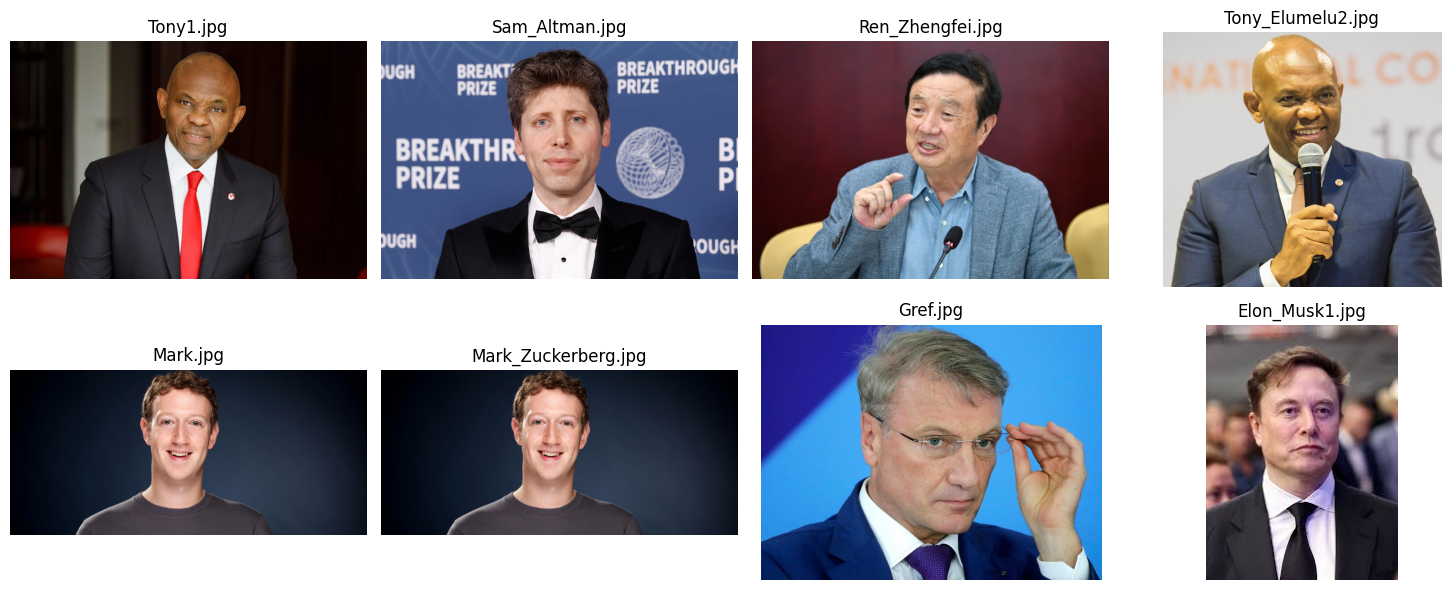

In [54]:
def display_database():
    images = os.listdir('face_database')
    fig, axes = plt.subplots(2, 4, figsize=(15, 6))

    # Filter out directories and only keep actual files
    image_files = [img for img in images if os.path.isfile(os.path.join('face_database', img))]

    for i, img_name in enumerate(image_files[:8]):
        img = Image.open(f'face_database/{img_name}')
        row = i // 4
        col = i % 4
        axes[row, col].imshow(img)
        axes[row, col].set_title(img_name)
        axes[row, col].axis('off')

    plt.tight_layout()
    plt.show()

display_database()

### TEST 1: DeepFace.verify() - Compare two images

In [69]:
# Test cases for verification
test_cases = [
    ("Tony1.jpg", "Tony_Elumelu2.jpg", "Same person - Tony Elumelu"),
    ("Elon_Musk.jpg", "Mark_Zuckerberg.jpg", "Different CEOs"),
    ("BillGates.jpg", "Jeff_Bezos.jpg", "Different tech leaders"),
]

In [70]:
print("Face Verification")
print("="*50)

for img1, img2, description in test_cases:
    try:
        result = DeepFace.verify(
            img1_path=f"face_database/{img1}",
            img2_path=f"face_database/{img2}",
            model_name="VGG-Face",
            detector_backend="opencv"
        )

        print(f"\n📸 {description}")
        print(f"   Images: {img1} vs {img2}")
        print(f"   ==>Verified: {result['verified']}")
        print(f"   ==>Distance: {result['distance']:.4f}")
        print(f"   ==>Threshold: {result['threshold']:.4f}")

    except Exception as e:
        print(f"❌ Error comparing {img1} and {img2}: {e}")

Face Verification

📸 Same person - Tony Elumelu
   Images: Tony1.jpg vs Tony_Elumelu2.jpg
   ==>Verified: True
   ==>Distance: 0.4870
   ==>Threshold: 0.6800

📸 Different CEOs
   Images: Elon_Musk.jpg vs Mark_Zuckerberg.jpg
   ==>Verified: False
   ==>Distance: 0.9657
   ==>Threshold: 0.6800

📸 Different tech leaders
   Images: BillGates.jpg vs Jeff_Bezos.jpg
   ==>Verified: True
   ==>Distance: 0.3989
   ==>Threshold: 0.6800


### TEST 2: DeepFace.find() - Find similar faces in database

In [74]:
print("\nFace Finding")
print("="*50)

# Test finding similar faces
query_images = ["Elon_Musk.jpg", "Tony_Elumelu2.jpg", "Sam_Altman.jpg"]

for query_img in query_images:
    print(f"\n==> Searching for faces similar to: {query_img}")
    print("-" * 50)

    try:
        results = DeepFace.find(
            img_path=f"face_database/{query_img}",
            db_path="face_database",
            model_name="VGG-Face",
            detector_backend="opencv",
            enforce_detection=False
        )

        if len(results) > 0:
            df = results[0]
            print(f"Found {len(df)} similar faces:")

            for idx, row in df.head(3).iterrows():
                identity = row['identity'].split('/')[-1].split('.')[0]
                distance = row['distance']
                print(f"   👤 {identity} | Distance: {distance:.4f}")
        else:
            print("   No similar faces found.")

    except Exception as e:
        print(f"❌ Error: {e}")


Face Finding

==> Searching for faces similar to: Elon_Musk.jpg
--------------------------------------------------
25-11-22 18:41:45 - Searching face_database/Elon_Musk.jpg in 15 length datastore
25-11-22 18:41:46 - find function duration 1.6907854080200195 seconds
Found 2 similar faces:
   👤 Elon_Musk1 | Distance: 0.0435
   👤 Elon_Musk | Distance: 0.0435

==> Searching for faces similar to: Tony_Elumelu2.jpg
--------------------------------------------------
25-11-22 18:41:47 - Searching face_database/Tony_Elumelu2.jpg in 15 length datastore
25-11-22 18:41:50 - find function duration 3.662216901779175 seconds
Found 4 similar faces:
   👤 Tony_Elumelu2 | Distance: 0.1096
   👤 Tony1 | Distance: 0.4213
   👤 Gref | Distance: 0.6723

==> Searching for faces similar to: Sam_Altman.jpg
--------------------------------------------------
25-11-22 18:41:51 - Searching face_database/Sam_Altman.jpg in 15 length datastore
25-11-22 18:41:52 - find function duration 2.2249536514282227 seconds
Found 

### TEST 3: Facial Analysis

In [75]:
print("\nFacial Analysis")
print("="*50)

ceos_to_analyze = ["Tony1.jpg","Elon_Musk.jpg", "Sam_Altman.jpg", "Mark_Zuckerberg.jpg"]

for img_name in ceos_to_analyze:
    try:
        analysis = DeepFace.analyze(
            img_path=f"face_database/{img_name}",
            actions=['age', 'gender', 'emotion', 'race'],
            detector_backend="opencv"
        )

        print(f"\n==> {img_name.split('.')[0]}:")
        print(f"   👤 Age: {analysis[0]['age']}")
        print(f"   🚻 Gender: {analysis[0]['dominant_gender']}")
        print(f"   😊 Emotion: {analysis[0]['dominant_emotion']}")
        print(f"   🌍 Race: {analysis[0]['dominant_race']}")

    except Exception as e:
        print(f"❌ Error analyzing {img_name}: {e}")


Facial Analysis


Action: race: 100%|██████████| 4/4 [00:02<00:00,  1.47it/s]



==> Tony1:
   👤 Age: 34
   🚻 Gender: Man
   😊 Emotion: neutral
   🌍 Race: black


Action: race: 100%|██████████| 4/4 [00:02<00:00,  1.93it/s]



==> Elon_Musk:
   👤 Age: 39
   🚻 Gender: Man
   😊 Emotion: sad
   🌍 Race: white


Action: race: 100%|██████████| 4/4 [00:02<00:00,  1.98it/s]



==> Sam_Altman:
   👤 Age: 32
   🚻 Gender: Man
   😊 Emotion: fear
   🌍 Race: white


Action: race: 100%|██████████| 4/4 [00:02<00:00,  1.99it/s]


==> Mark_Zuckerberg:
   👤 Age: 34
   🚻 Gender: Man
   😊 Emotion: happy
   🌍 Race: white


### Summary of Results

In [76]:
print("\n==================== SUMMARY ====================")
print("✅ Database created with 9 CEO/tech leader images")
print("✅ DeepFace.verify() - Tests same/different person verification")
print("✅ DeepFace.find() - Finds similar faces in database")
print("✅ Facial Analysis - Provides age, gender, emotion, race analysis")
print("\n📁 Database contains:")
images = os.listdir('face_database')
for img in images:
    print(f"   • {img.split('.')[0]}")


==================== SUMMARY ====================
✅ Database created with 9 CEO/tech leader images
✅ DeepFace.verify() - Tests same/different person verification
✅ DeepFace.find() - Finds similar faces in database
✅ Facial Analysis - Provides age, gender, emotion, race analysis

📁 Database contains:
   • Tony1
   • Sam_Altman
   • 
   • Ren_Zhengfei
   • Tony_Elumelu2
   • Mark
   • Mark_Zuckerberg
   • Gref
   • Elon_Musk1
   • Jeff
   • Jeff_Bezos
   • Herman_Gref
   • ds_model_vggface_detector_opencv_aligned_normalization_base_expand_0
   • Elon_Musk
   • BillGates
